In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
 
import warnings

warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [14]:
housing=pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
varlist=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
         
# Defining the map function
def binary_map(x):
         return x.map({'yes':1,"no":0})
         
# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
         
# Check the housing dataframe now
housing.head()
        

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [16]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state=5)

In [17]:
m = len(df_train)
k = len(df_test)

In [79]:
# Seperate Input and Output from problem 1a

num_vars=['price','area','bedrooms','bathrooms','stories','parking']

train1a=df_train[num_vars]
test1a=df_test[num_vars]

y = train1a.pop('price')
x1a = train1a
valx1a = test1a
valy1a = test1a.pop('price')

X_0a = np.ones((m, 1))
x1a = np.hstack((X_0a, x1a))
X_0a = np.ones((k, 1))
valx1a = np.hstack((X_0a, valx1a))

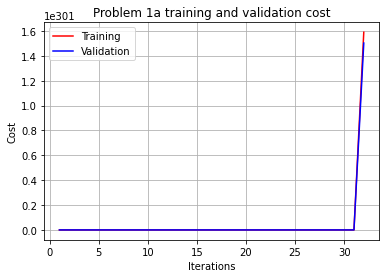

In [80]:
lamda=0
iterations = 2000
alpha = 0.001
theta = np.zeros(len(num_vars))

theta, cost_history, valcost = gradient_descent(x1a, y, valx1a, valy1a, theta, alpha, iterations, lamda)

iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, valcost, color= 'blue', label = 'Validation')
plt.title('Problem 1a training and validation cost')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()

In [81]:
# Seperate Input and Output from problem 1b
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
           'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

train1b=df_train[num_vars]
test1b=df_test[num_vars]

y = train1b.pop('price')
x1b = train1b
valx1b = test1b
valy1b = test1b.pop('price')

X_0b = np.ones((m, 1))
x1b = np.hstack((X_0b, x1b))
X_0b = np.ones((k, 1))
valx1b = np.hstack((X_0b, valx1b))

In [82]:
lamda=0
iterations = 2000
alpha = 0.001
theta = np.zeros(len(num_vars))

theta, cost_history, valcost = gradient_descent(x1b, y, valx1b, valy1b, theta, alpha, iterations, lamda)
iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, valcost, color= 'blue', label = 'Validation')
plt.title('Problem 1a training and validation cost')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()

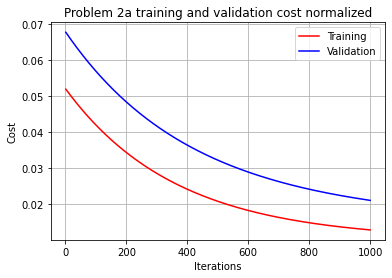

In [89]:
#2a
num_vars=['price','area','bedrooms','bathrooms','stories','parking']



train2a=df_train[num_vars]
test2a=df_test[num_vars]

#Normalzied
scaler = MinMaxScaler()
train2a[num_vars] = scaler.fit_transform(train2a[num_vars] ) 
test2a[num_vars] = scaler.fit_transform(test2a[num_vars]) 

y2a = train2a.pop('price')
x2a = train2a
valx2a = test2a
valy2a = test2a.pop('price')

X_0a = np.ones((m, 1))
x2a = np.hstack((X_0a, x2a))
X_0a = np.ones((k, 1))
valx2a = np.hstack((X_0a, valx2a))



lamda=0
iterations = 1000
alpha = 0.001
theta = np.zeros(len(num_vars))

theta, cost_history, valcost = gradient_descent(x2a, y2a, valx2a, valy2a, theta, alpha, iterations, lamda)

iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, valcost, color= 'blue', label = 'Validation')
plt.title('Problem 2a training and validation cost normalized')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()

#Standardized
train2a=df_train[num_vars]
test2a=df_test[num_vars]

scaler = StandardScaler()
train2a[num_vars] = scaler.fit_transform(train2a[num_vars] ) 
test2a[num_vars] = scaler.fit_transform(test2a[num_vars])

y2a = train2a.pop('price')
x2a = train2a
valx2a = test2a
valy2a = test2a.pop('price')

X_0a = np.ones((m, 1))
x2a = np.hstack((X_0a, x2a))
X_0a = np.ones((k, 1))
valx2a = np.hstack((X_0a, valx2a))



lamda=0
iterations = 1000
alpha = 0.001
theta = np.zeros(len(num_vars))

theta, cost_history, valcost = gradient_descent(x2a, y2a, valx2a, valy2a, theta, alpha, iterations, lamda)

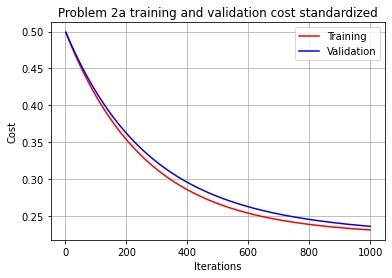

In [88]:
#Plot of 2a standardized

iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, valcost, color= 'blue', label = 'Validation')
plt.title('Problem 2a training and validation cost standardized')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()

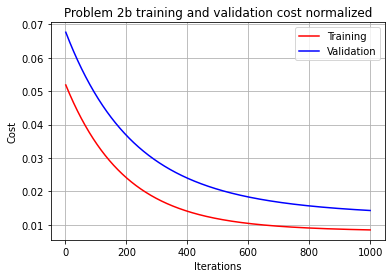

In [92]:
#2b
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
           'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

train2b=df_train[num_vars]
test2b=df_test[num_vars]

#Normalzied
scaler = MinMaxScaler()
train2b[num_vars] = scaler.fit_transform(train2b[num_vars] ) 
test2b[num_vars] = scaler.fit_transform(test2b[num_vars]) 

y2b = train2b.pop('price')
x2b = train2b
valx2b = test2b
valy2b = test2b.pop('price')

X_0b = np.ones((m, 1))
x2b = np.hstack((X_0b, x2b))
X_0b = np.ones((k, 1))
valx2b = np.hstack((X_0b, valx2b))



lamda=0
iterations = 1000
alpha = 0.001
theta = np.zeros(len(num_vars))

theta, cost_history, valcost = gradient_descent(x2b, y2b, valx2b, valy2b, theta, alpha, iterations, lamda)

iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, valcost, color= 'blue', label = 'Validation')
plt.title('Problem 2b training and validation cost normalized')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()

#Standardized
train2b=df_train[num_vars]
test2b=df_test[num_vars]

scaler = StandardScaler()
train2b[num_vars] = scaler.fit_transform(train2b[num_vars] ) 
test2b[num_vars] = scaler.fit_transform(test2b[num_vars])

y2b = train2b.pop('price')
x2b = train2b
valx2b = test2b
valy2b = test2b.pop('price')

X_0b = np.ones((m, 1))
x2b = np.hstack((X_0b, x2b))
X_0b = np.ones((k, 1))
valx2b = np.hstack((X_0b, valx2b))



lamda=0
iterations = 1000
alpha = 0.001
theta = np.zeros(len(num_vars))

theta, cost_history, valcost = gradient_descent(x2b, y2b, valx2b, valy2b, theta, alpha, iterations, lamda)

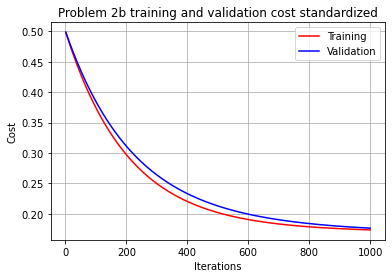

In [93]:
iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, valcost, color= 'blue', label = 'Validation')
plt.title('Problem 2b training and validation cost standardized')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()

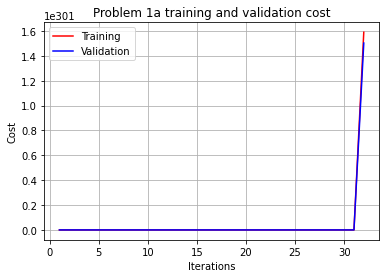

In [83]:
#3a
num_vars=['price','area','bedrooms','bathrooms','stories','parking']

train1a=df_train[num_vars]
test1a=df_test[num_vars]

y = train1a.pop('price')
x1a = train1a
valx1a = test1a
valy1a = test1a.pop('price')

X_0a = np.ones((m, 1))
x1a = np.hstack((X_0a, x1a))
X_0a = np.ones((k, 1))
valx1a = np.hstack((X_0a, valx1a))



lamda=0.1
iterations = 1000
alpha = 0.001
theta = np.zeros(len(num_vars))

theta, cost_history, valcost = gradient_descent(x1a, y, valx1a, valy1a, theta, alpha, iterations, lamda)

iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, valcost, color= 'blue', label = 'Validation')
plt.title('Problem 1a training and validation cost')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()

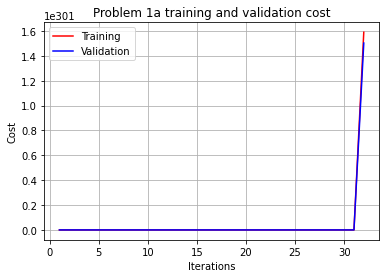

In [84]:
#3b
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
           'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

train1b=df_train[num_vars]
test1b=df_test[num_vars]

y = train1b.pop('price')
x1b = train1b
valx1b = test1b
valy1b = test1b.pop('price')

X_0b = np.ones((m, 1))
x1b = np.hstack((X_0b, x1b))
X_0b = np.ones((k, 1))
valx1b = np.hstack((X_0b, valx1b))


lamda=0.1
iterations = 1000
alpha = 0.001
theta = np.zeros(len(num_vars))

theta, cost_history, valcost = gradient_descent(x1b, y, valx1b, valy1b, theta, alpha, iterations, lamda)
iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, valcost, color= 'blue', label = 'Validation')
plt.title('Problem 1a training and validation cost')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()

In [55]:
#Cost Function with Parameter Penalties

def computecost(x, y, theta, lamda, size):

    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    sqrThetas = np.square(theta)
    J = 1/(2*size)*(np.sum(sqrErrors)+lamda*np.sum(sqrThetas))
    
    return J

In [62]:
#Gradient Descent With Parameter Penalties

def gradient_descent(x, y, valx, valy, theta, alpha, iterations, lamda):
    
    cost_history = np.zeros(iterations)
    valcost = np.zeros(iterations)
    
    for i in range(iterations):
        
        predictions = x.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * x.transpose().dot(errors);
        theta = theta * (1- alpha*(lamda/m)) - sum_delta;
        cost_history[i] = computecost(x, y, theta, lamda, m)
        valcost[i] = computecost(valx, valy, theta, 0, k)

        
       

    return theta, cost_history, valcost